<a href="https://colab.research.google.com/github/nxxk23/Coconut-Counter/blob/main/coconut-tracking-yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Jun 18 07:13:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## **🥥 Import Coconut Dataset**

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="mv0NmBZ5H8VG6PL35oxF")
project = rf.workspace("ninkspaces").project("coconut-datasets")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to coconut-datasets-1 in yolov8:: 100%|██████████| 880/880 [00:00<00:00, 6750.59it/s]


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 plots=True


/content
100% 6.23M/6.23M [00:00<00:00, 358MB/s]
New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/coconut-datasets-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stre

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch242.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1718694999.011f76669bae.4422.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch240.jpg	weights
P_curve.png					    train_batch241.jpg


/content


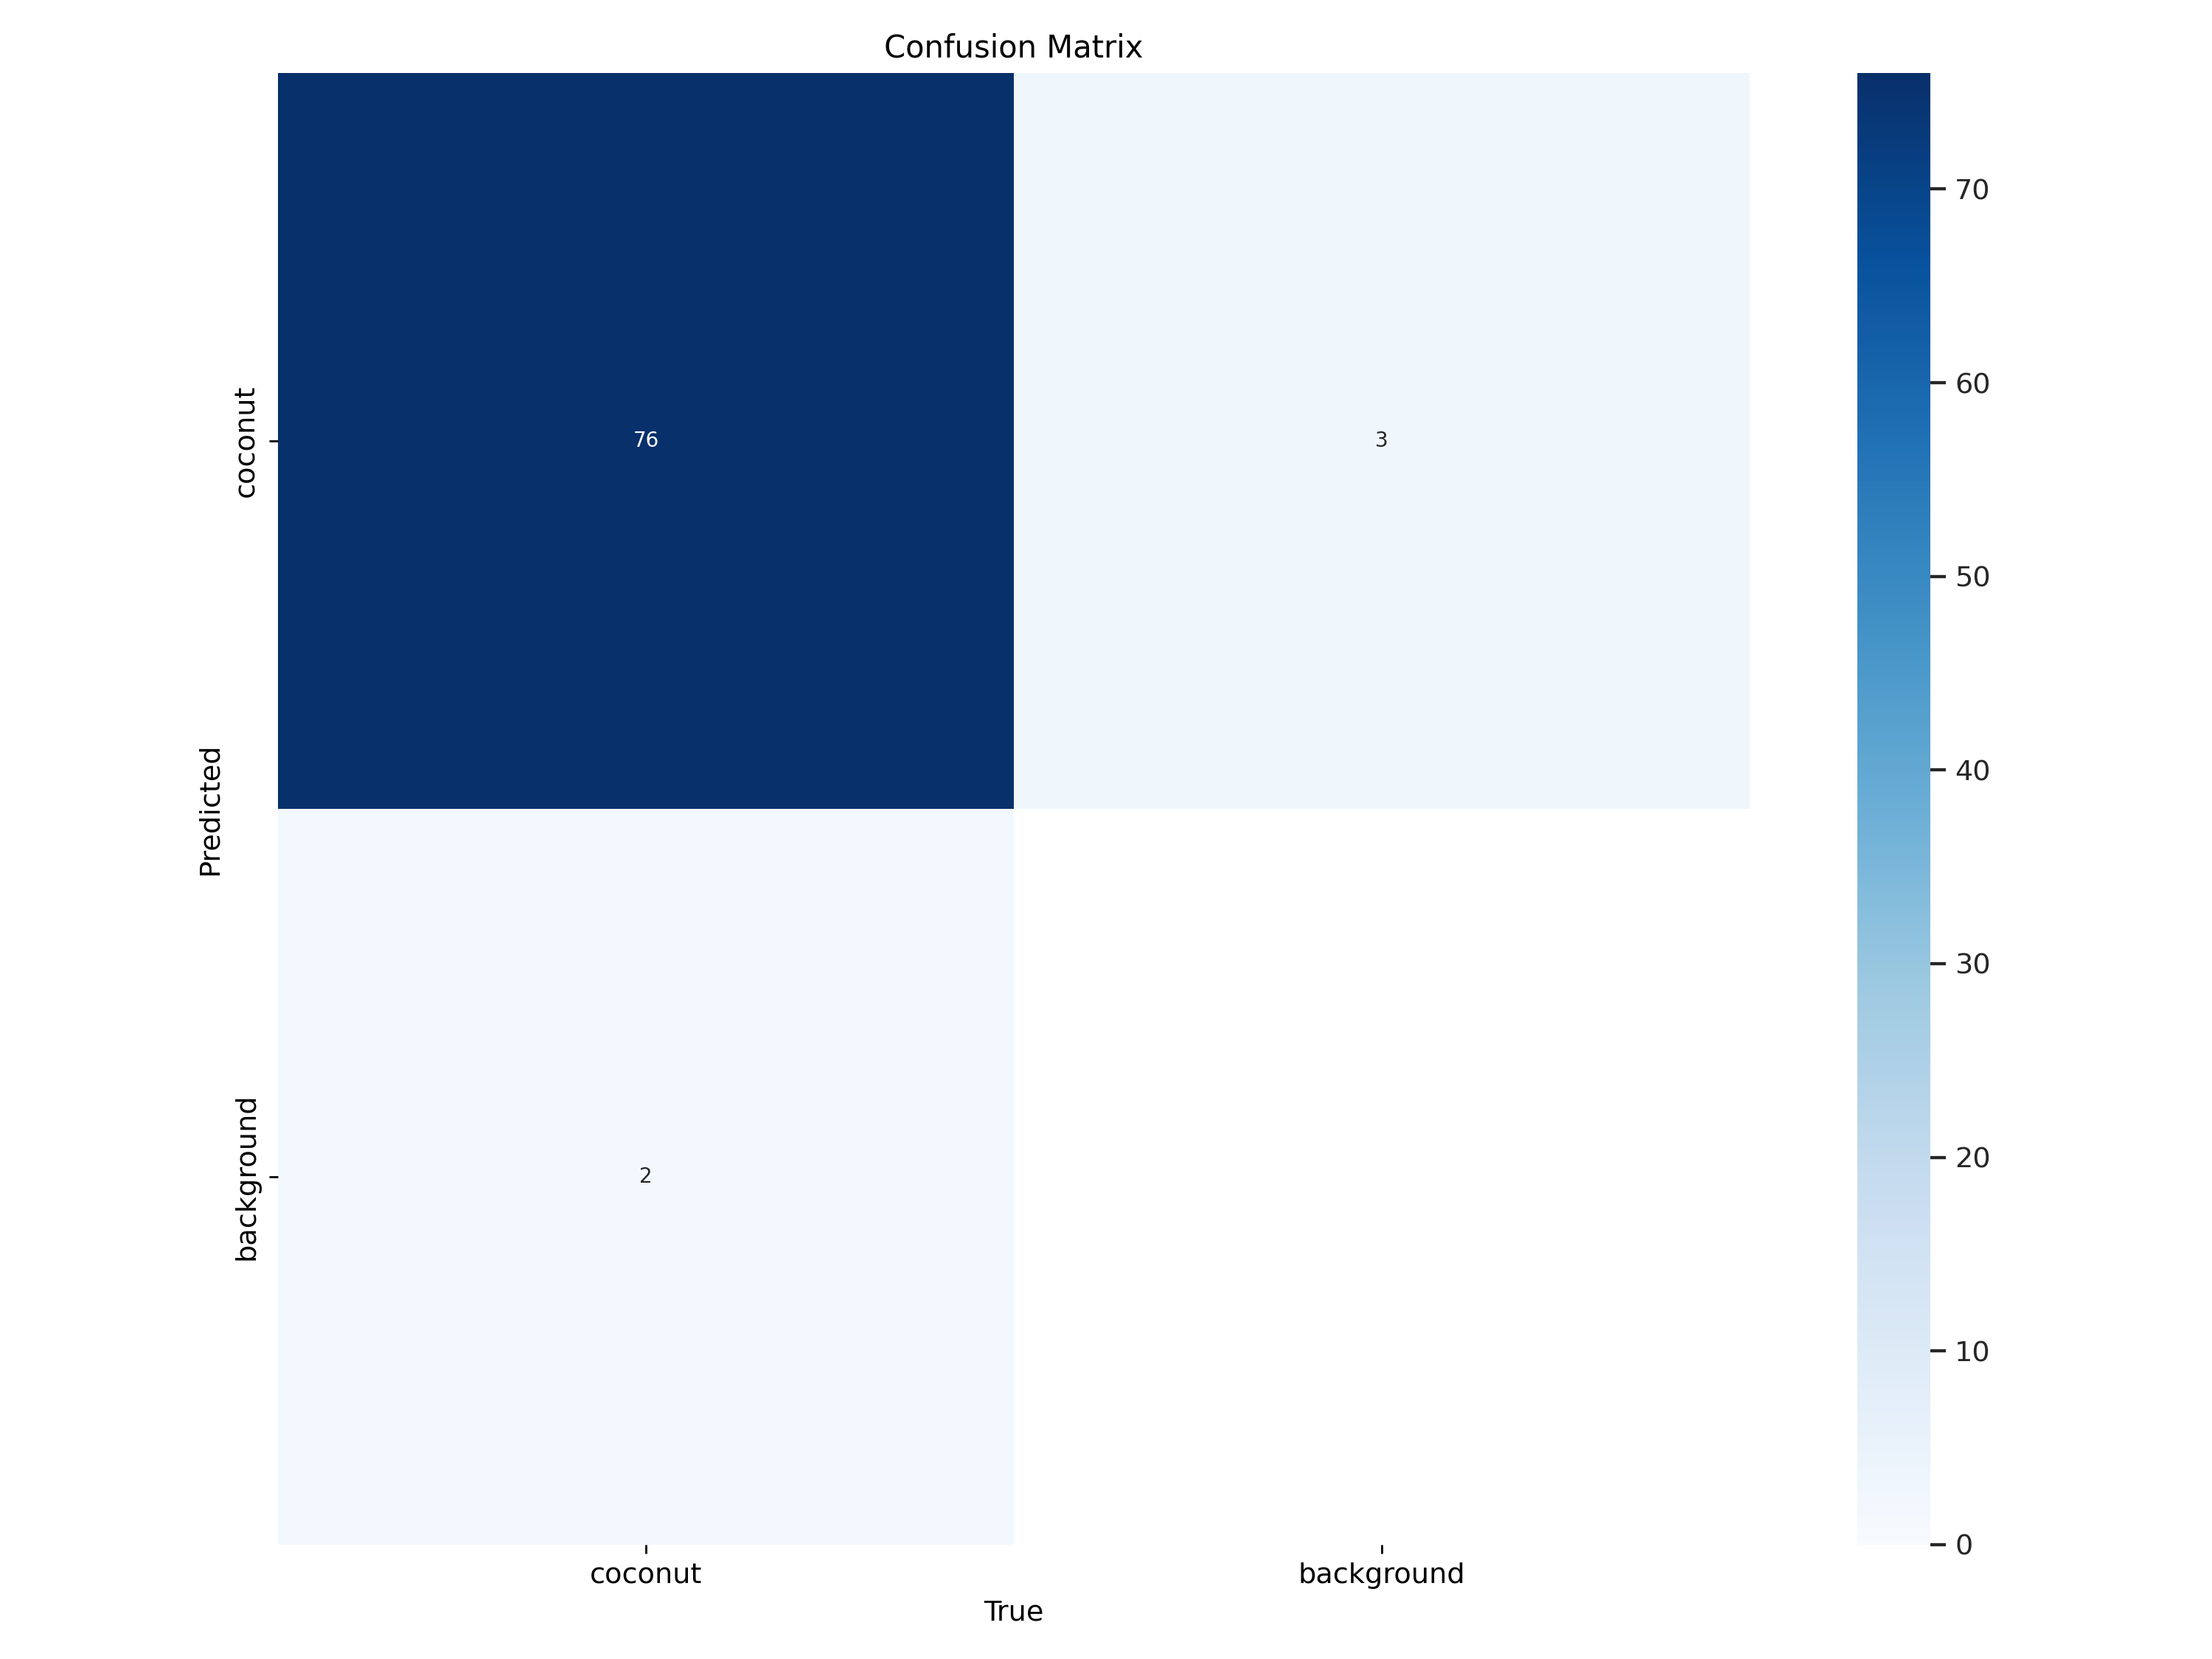

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


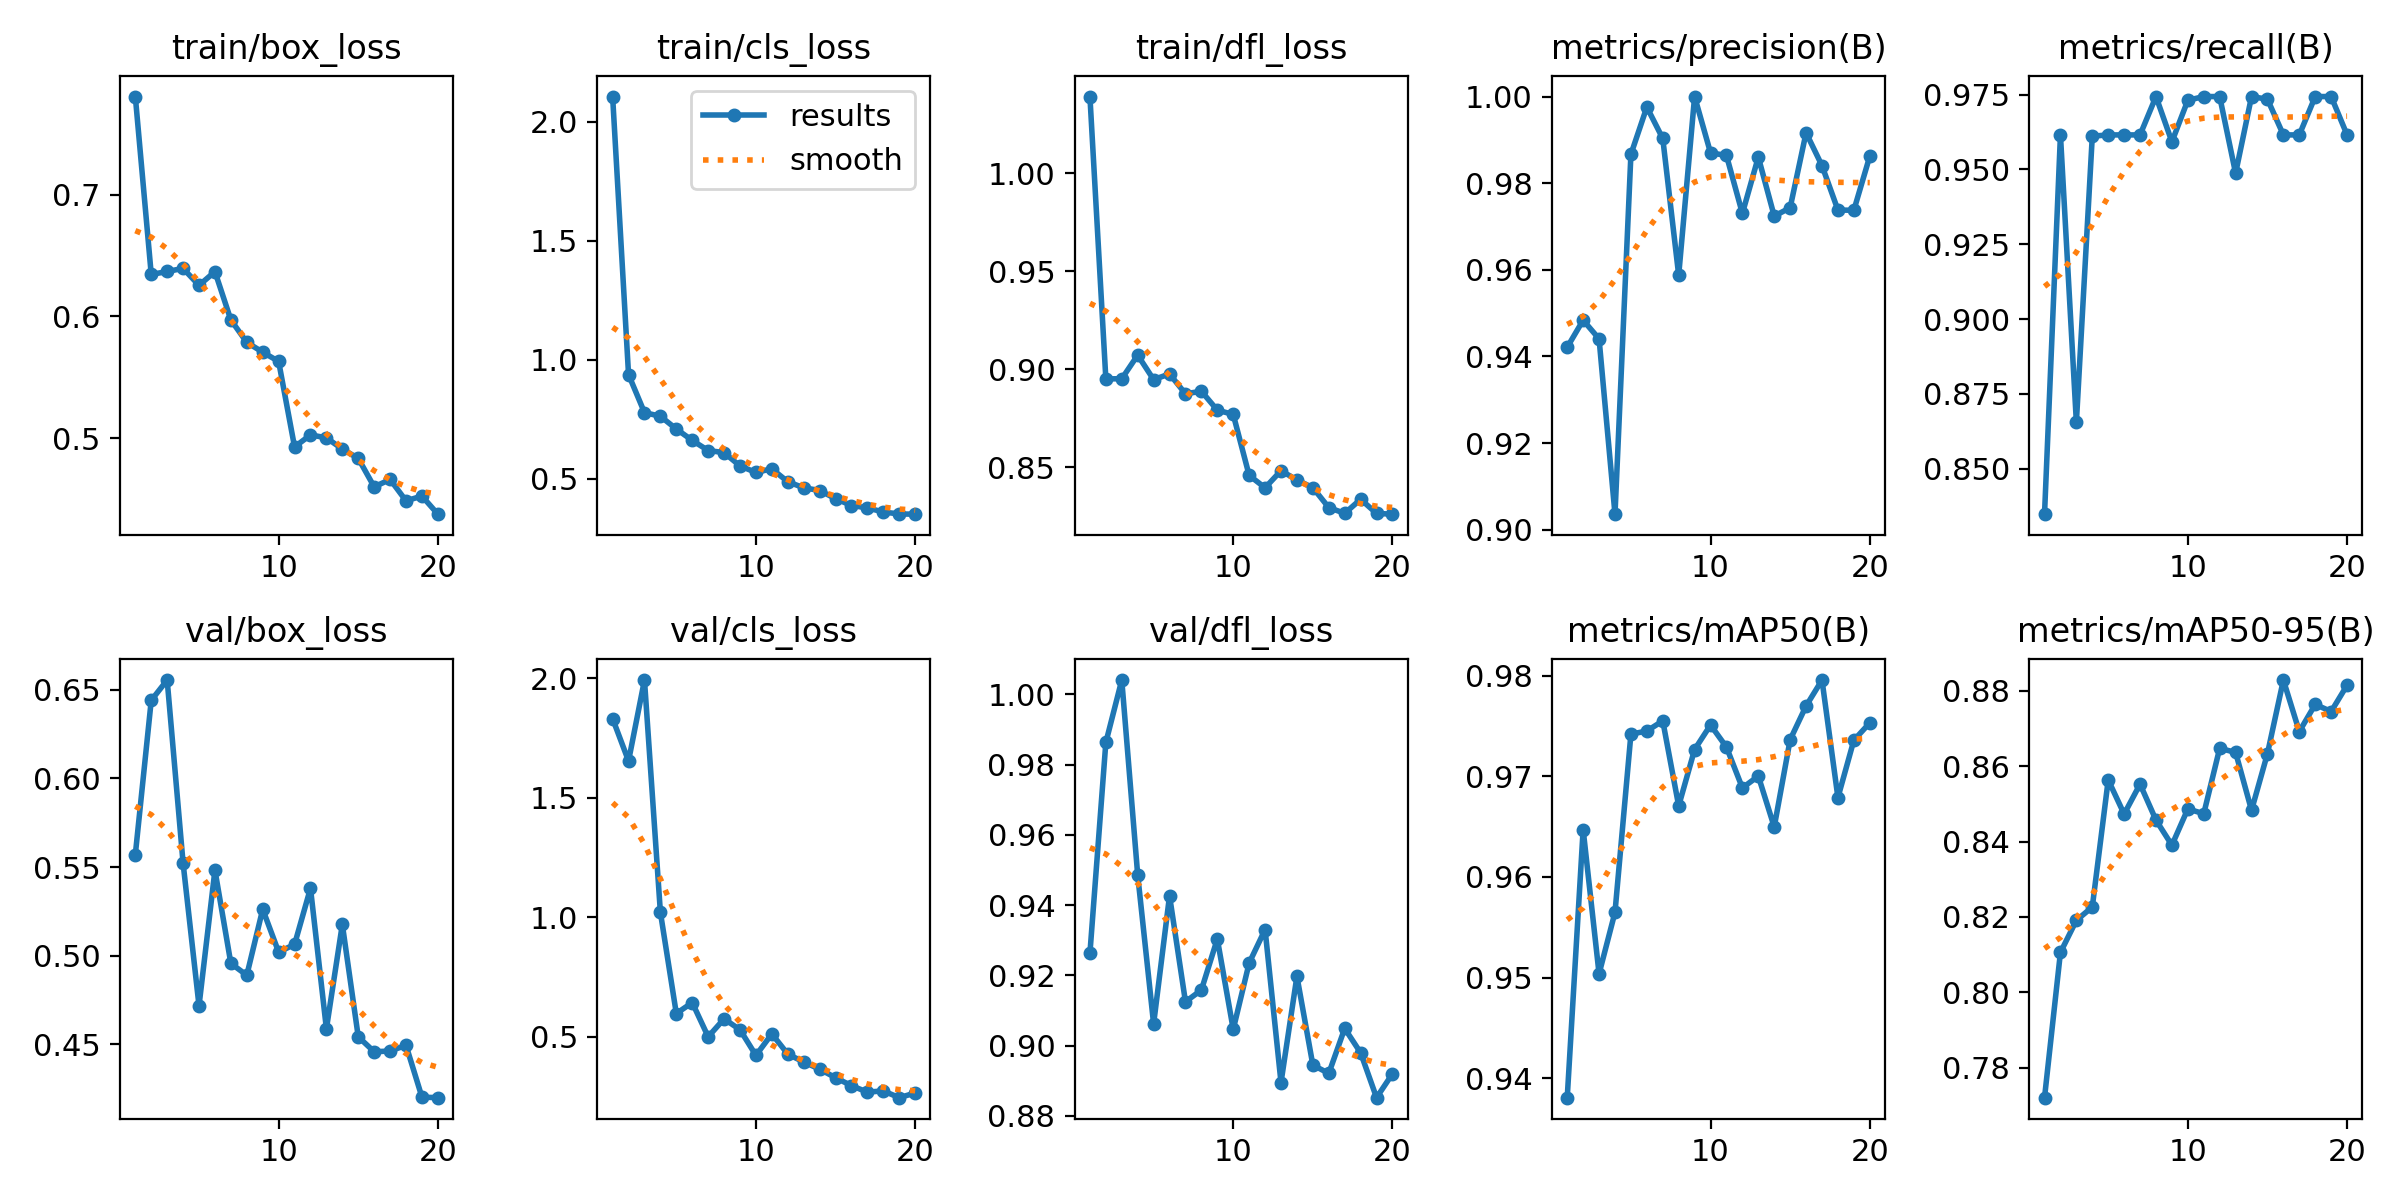

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000) #new

/content


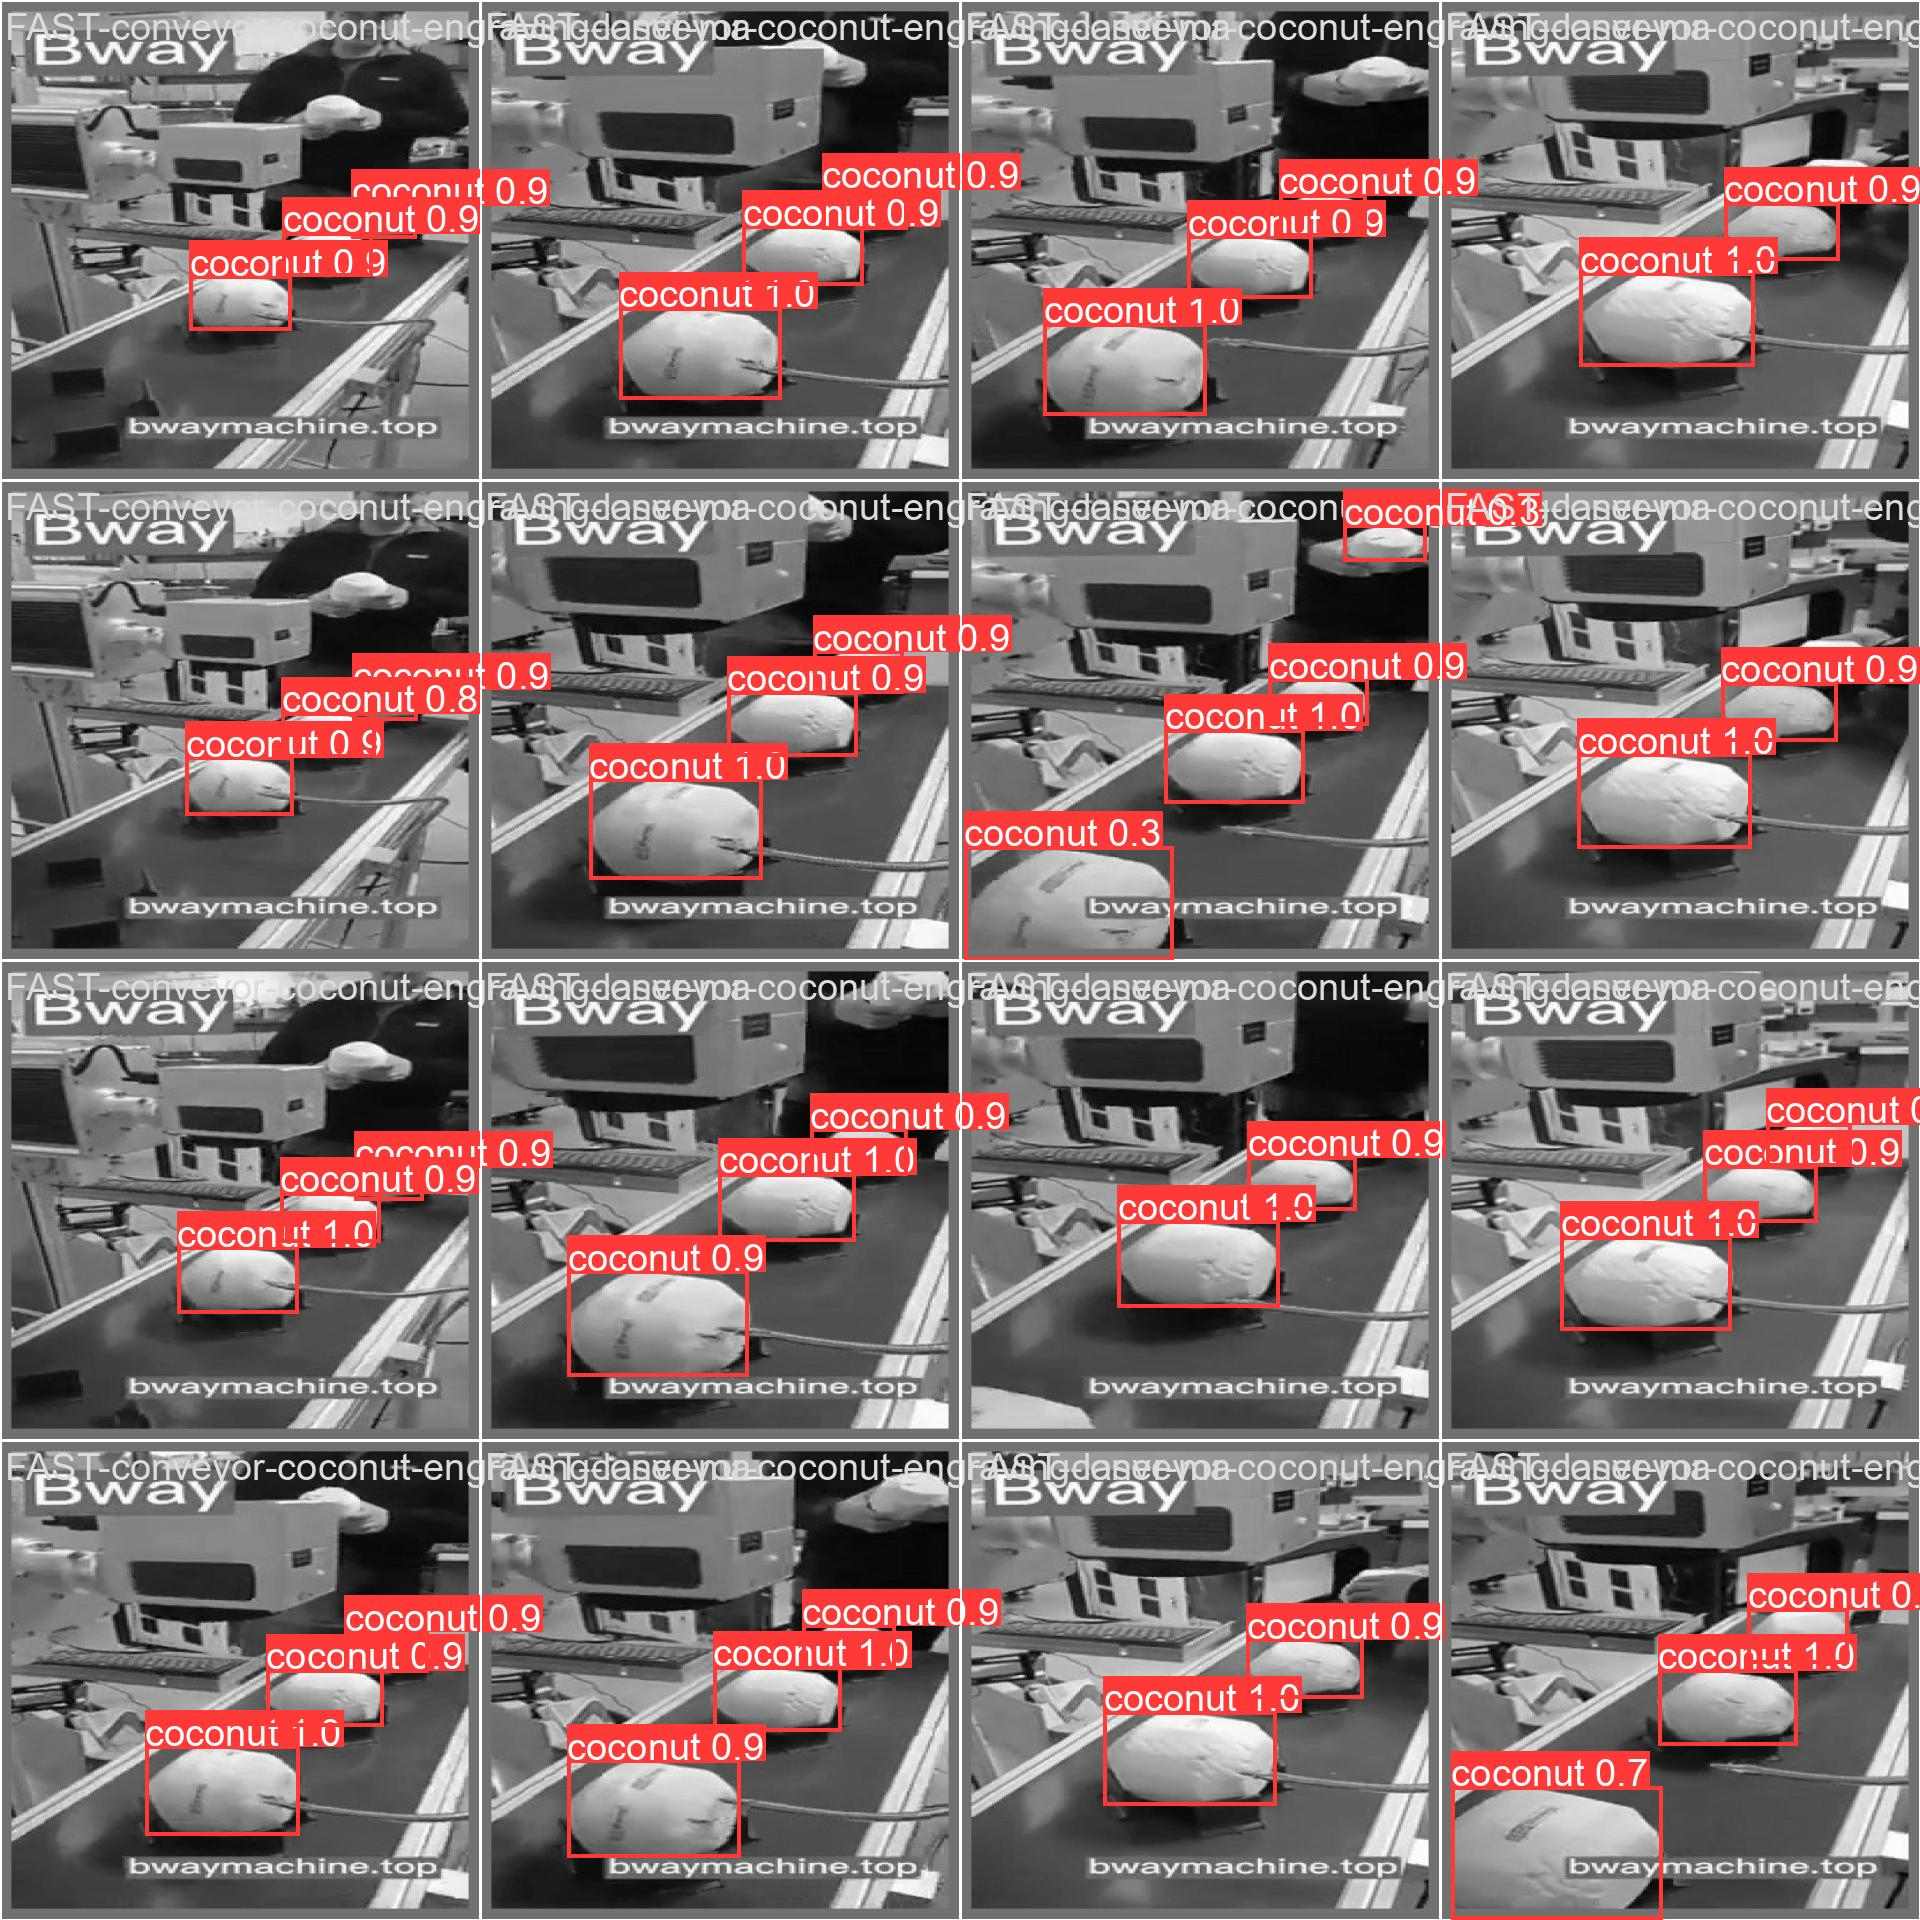

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800) #new

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/coconut-datasets-1/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.05it/s]
                   all         34         78      0.991      0.962      0.977      0.882
Speed: 2.2ms preprocess, 28.0ms inference, 0.0ms loss, 24.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/22 /content/datasets/coconut-datasets-1/test/images/FAST-conveyor-coconut-engraving-laser-machine1000pcs_h_mp4-0000_jpg.rf.27248e3623a71e669b4b36a6907d1a26.jpg: 640x640 3 coconuts, 10.7ms
image 2/22 /content/datasets/coconut-datasets-1/test/images/FAST-conveyor-coconut-engraving-laser-machine1000pcs_h_mp4-0017_jpg.rf.c388c8e2b24c853364c1fd29da2541ef.jpg: 640x640 3 coconuts, 11.8ms
image 3/22 /content/datasets/coconut-datasets-1/test/images/FAST-conveyor-coconut-engraving-laser-machine1000pcs_h_mp4-0021_jpg.rf.ccdc7b01291ff0ea7e682727eea88116.jpg: 640x640 3 coconuts, 7.3ms
image 4/22 /content/datasets/coconut-datasets-1/test/images/FAST-conveyor-coconut-engraving-laser-machine1000pcs_h_mp4-0023_jpg.rf.373e2b408d4ed711b0ea587a0e36b2f7.jpg: 640x640 3 coconuts, 7.3ms

**NOTE:** Let's take a look at few results.

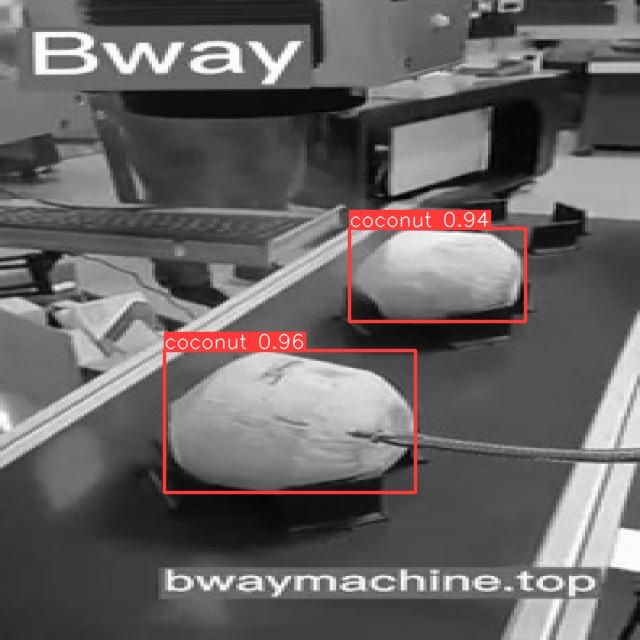

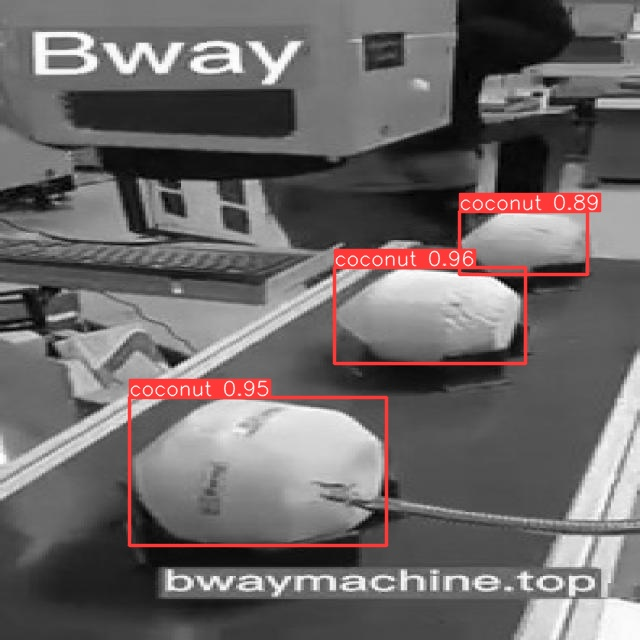

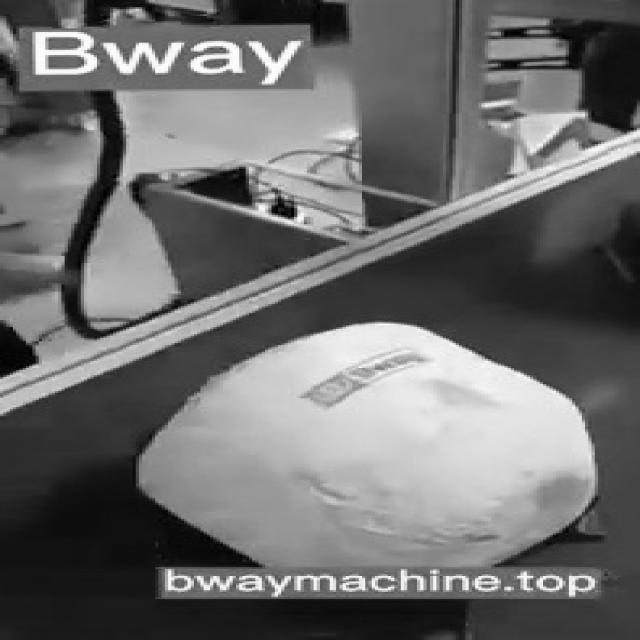

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [14]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/ninkspaces/coconut-datasets/1
Share your model with the world at: https://universe.roboflow.com/ninkspaces/coconut-datasets/model/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

## **Tracking Process 🚧**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%pip install ultralytics

In [2]:
import cv2
from ultralytics import YOLO, solutions

In [18]:
!python -c "import cv2; print(cv2.__version__)"

4.8.0


In [ ]:
#modeldrive = YOLO("/content/drive/MyDrive/INET/best.pt")
#modeldrive.names

In [3]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
print(model.names)
#results = model(source='/content/drive/MyDrive/INET/Coconut.mp4', conf=0.25,save=True)

{0: 'coconut'}


In [7]:
import cv2

from ultralytics import YOLO, solutions

model = YOLO("/content/runs/detect/train/weights/best.pt")
cap = cv2.VideoCapture("/content/drive/MyDrive/INET/train.mp4")
assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

line_y = int(h * 0.5)
line_points = [(0, line_y), (2000, line_y)]

# Video writer
video_writer = cv2.VideoWriter("coconut.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Init Object Counter
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=line_points,
    classes_names=model.names,
    draw_tracks=True,
    line_thickness=1,
    view_out_counts=False,
)

# Read and process the first frame to warm up the model
success, im0 = cap.read()
if success:
    model.track(im0, persist=True, show=False)

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    tracks = model.track(im0, persist=True, show=False)

    im0 = counter.start_counting(im0, tracks)
    video_writer.write(im0)

cap.release()
video_writer.release()
#cv2.destroyAllWindows()

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Line Counter Initiated.

0: 640x352 1 coconut, 93.3ms
Speed: 1.7ms preprocess, 93.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 1 coconut, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 1 coconut, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 2 coconuts, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 1 coconut, 13.1ms
Speed: 1.7ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 1 coconut, 6.6ms
Speed: 2.1ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 1 coconut, 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)

0: 640x352 1 coconu